__[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet)__

In [3]:
reset -fs

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [36]:
# Load the example dataset for Anscombe's quartet
anscombe = sns.load_dataset('anscombe')
anscombe
pd.crosstab(pd.RangeIndex(start=0, stop=10), [anscombe['dataset'], ])

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [65]:
anscombe1 = anscombe[anscombe['dataset'] == 'I'].copy()
anscombe1.drop('dataset', axis=1, inplace=True)
anscombe1.reset_index(inplace=True)


anscombe2 = anscombe[anscombe['dataset'] == 'II'].copy()
anscombe2.drop('dataset', axis=1, inplace=True)
anscombe2.reset_index(inplace=True)

anscombe3 = anscombe[anscombe['dataset'] == 'III'].copy()
anscombe3.drop('dataset', axis=1, inplace=True)
anscombe3.reset_index(inplace=True)

anscombe4 = anscombe[anscombe['dataset'] == 'IV'].copy()
anscombe4.drop('dataset', axis=1, inplace=True)
anscombe4.reset_index(inplace=True)


anscombe1['dataset_2'] = anscombe2['y']
anscombe1['dataset_3'] = anscombe3['y']
anscombe1['dataset_4'] = anscombe4['y']



In [66]:
anscombe1.set_index('index',inplace=True)
anscombe1.head()

,x,y,dataset_2,dataset_3,dataset_4
index,,,,,
0,10.0,8.04,9.14,7.46,6.58
1,8.0,6.95,8.14,6.77,5.76
2,13.0,7.58,8.74,12.74,7.71
3,9.0,8.81,8.77,7.11,8.84
4,11.0,8.33,9.26,7.81,8.47


In [67]:
anscombe1.columns = ['x', 'dataset_1', 'dataset_2', 'dataset_3', 'dataset_4']
anscombe1.head()

,x,dataset_1,dataset_2,dataset_3,dataset_4
index,,,,,
0,10.0,8.04,9.14,7.46,6.58
1,8.0,6.95,8.14,6.77,5.76
2,13.0,7.58,8.74,12.74,7.71
3,9.0,8.81,8.77,7.11,8.84
4,11.0,8.33,9.26,7.81,8.47


In [68]:
# Descriptive statistics are almost identical for all four datasets

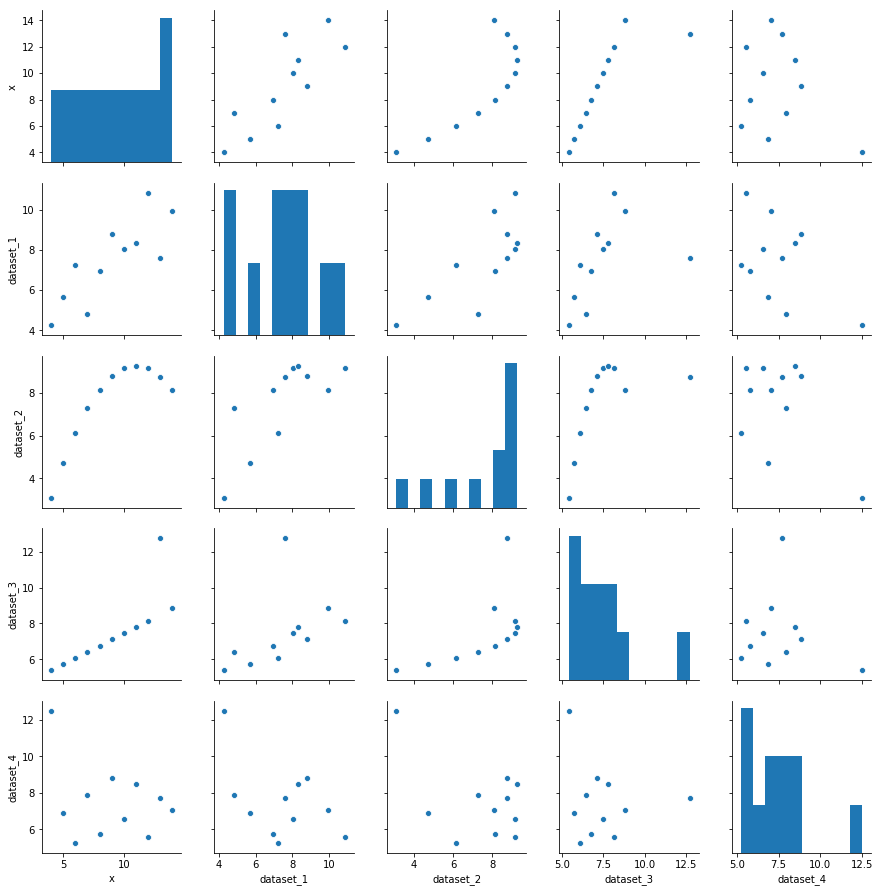

In [69]:
sns.pairplot(anscombe1)

In [14]:
0.817**2

0.6674889999999999

In [72]:
# 'I', 'II', 'III', 'IV'
dataset = 'IV' 
slope, intercept, r_value, p_value, std_err = stats.linregress(x=anscombe1['x'],
                                                               y=anscombe1['dataset_1'])
print("""
slope       = {:.1f} 
intercept   = {:.2f} 
correlation = {:.3f} 
p value     = {:.3f}
std error   = {:.3f}""".format(slope, intercept, r_value, p_value , std_err))


slope       = 0.5 
intercept   = 3.00 
correlation = 0.816 
p value     = 0.002
std error   = 0.118


In [73]:
results = []
for i in range(1,5):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=anscombe1['x'],
                                                               y=anscombe1['dataset_{}'.format(i)])
    results.append([slope, intercept, r_value])

In [79]:
sns.lmplot()

TypeError: lmplot() missing 3 required positional arguments: 'x', 'y', and 'data'

In [74]:
results

[[0.5000909090909091, 3.0000909090909103, 0.8164205163448399],
 [0.5000000000000001, 3.000909090909089, 0.816236506000243],
 [0.4997272727272729, 3.002454545454544, 0.8162867394895984],
 [-0.19227272727272726, 9.231363636363636, -0.314046706495578]]

//anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


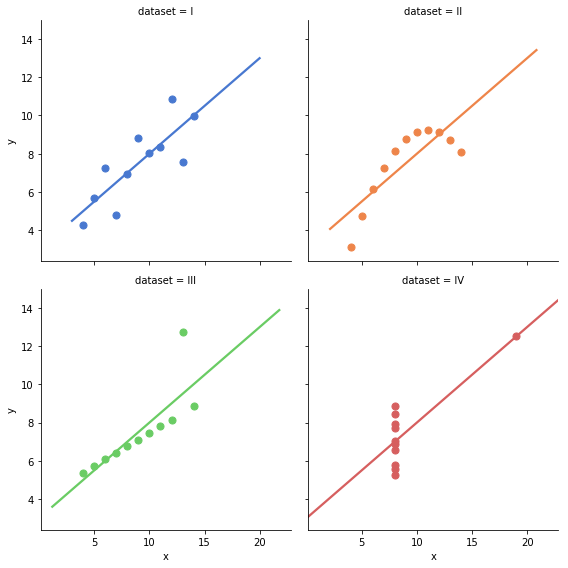

In [80]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", size=4, scatter_kws={"s": 50, "alpha": 1});

<br>
<br> 
<br>